explore dataset and make a few visuals  
look for q that can be answered with an experiment  
* Analysis that highlights your experimental hypothesis.  
* A rollout plan showing how you would implement and rollout the experiment  
* An evaluation plan showing what constitutes success in this experiment  

target 3-5 pages  



Using 
https://www.kaggle.com/chicago/chicago-red-light-and-speed-camera-data

In [58]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
import os
os.getcwd()

'C:\\Users\\Chris\\Documents\\thinkful\\thinkful_notes\\notes'

In [7]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = r"C:\Users\Chris\Documents\thinkful\data_sets\chicago-red-light-and-speed-camera-data.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip:    #readmode
    zip.printdir() 
    zip.extractall(path=r'C:\Users\Chris\Documents\thinkful\data_sets\speed_cam') 

File Name                                             Modified             Size
socrata_metadata_speed-camera-violations.json  2019-06-06 22:50:52        17371
socrata_metadata_red-light-camera-locations.json 2019-06-06 22:50:52        10604
speed-camera-locations.csv                     2019-06-06 22:50:52        42073
red-light-camera-locations.csv                 2019-06-06 22:50:52        34534
speed-camera-violations.csv                    2019-06-06 22:50:52     53258913
red-light-camera-violations.csv                2019-06-06 22:50:54    141887527
socrata_metadata_speed-camera-locations.json   2019-06-06 22:50:58        10424
socrata_metadata_red-light-camera-violations.json 2019-06-06 22:50:58        19172


In [9]:
df = pd.read_csv(r'C:\Users\Chris\Documents\thinkful\data_sets\speed_cam\speed-camera-violations.csv')

In [126]:
df.tail()

,address,camera_id,violation_date,violations,x_coordinate,y_coordinate,latitude,longitude,location,historical_wards_2003-2015,zip_codes,community_areas,census_tracts,wards,violation_dt
188618,732 N PULASKI RD,CHI109,2014-07-01T00:00:00.000,67,1.149548e+06,1.904732e+06,41.894503,-87.726205,"{'longitude': '-87.72620452246953', 'latitude'...",11.0,21572.0,24.0,99.0,45,2014-07-01
188619,7422 S JEFFERY,CHI101,2014-07-01T00:00:00.000,26,1.190790e+06,1.856046e+06,41.760006,-87.576313,"{'longitude': '-87.57631298283938', 'latitude'...",9.0,22538.0,39.0,419.0,35,2014-07-01
188620,7518 S VINCENNES,CHI063,2014-07-01T00:00:00.000,124,1.175649e+06,1.855003e+06,41.757497,-87.631833,"{'longitude': '-87.63183332832696', 'latitude'...",17.0,21554.0,67.0,495.0,32,2014-07-01
188623,7826 S PULASKI,CHI072,2014-07-01T00:00:00.000,27,1.151041e+06,1.852282e+06,41.750546,-87.722093,"{'longitude': '-87.72209265589272', 'latitude'...",23.0,4300.0,69.0,571.0,30,2014-07-01
188624,7833 S PULASKI,CHI071,2014-07-01T00:00:00.000,120,1.151122e+06,1.852224e+06,41.750385,-87.721795,"{'longitude': '-87.72179453872008', 'latitude'...",6.0,4300.0,69.0,571.0,30,2014-07-01


In [ ]:
#renmae to simpler names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [21]:
#remove nulls
df.dropna(axis=0, subset=['zip_codes'], inplace=True)

In [38]:
df.dtypes

address                               object
camera_id                             object
violation_date                        object
violations                             int64
x_coordinate                         float64
y_coordinate                         float64
latitude                             float64
longitude                            float64
location                              object
historical_wards_2003-2015           float64
zip_codes                            float64
community_areas                      float64
census_tracts                        float64
wards                                float64
violation_dt                  datetime64[ns]
dtype: object

In [33]:
#get column of just dates in date format
df['violation_dt'] = df['violation_date'].apply(lambda x: x[:10])
df['violation_dt'] = pd.to_datetime(df['violation_dt'])

In [61]:
#change wards to ints
df.wards = df.wards.astype(int)

In [62]:
df.head()

,address,camera_id,violation_date,violations,x_coordinate,y_coordinate,latitude,longitude,location,historical_wards_2003-2015,zip_codes,community_areas,census_tracts,wards,violation_dt
0,10318 S INDIANAPOLIS,CHI120,2019-05-23T00:00:00.000,88,1.203645e+06,1.837056e+06,41.707577,-87.529848,"{'longitude': '-87.52984826112849', 'latitude'...",47.0,21202.0,49.0,705.0,47,2019-05-23
1,1110 S PULASKI RD,CHI163,2019-05-23T00:00:00.000,21,1.149841e+06,1.894931e+06,41.867603,-87.725383,"{'longitude': '-87.7253827433152', 'latitude':...",36.0,21572.0,30.0,98.0,14,2019-05-23
3,11144 S VINCENNES,CHI023,2019-05-23T00:00:00.000,26,1.166994e+06,1.830711e+06,41.691025,-87.664248,"{'longitude': '-87.6642476900556', 'latitude':...",33.0,22212.0,74.0,378.0,42,2019-05-23
4,11153 S VINCENNES,CHI022,2019-05-23T00:00:00.000,17,1.167029e+06,1.830594e+06,41.690702,-87.664122,"{'longitude': '-87.66412238501842', 'latitude'...",45.0,22212.0,74.0,378.0,22,2019-05-23
5,1117 S PULASKI RD,CHI162,2019-05-23T00:00:00.000,26,1.149923e+06,1.894858e+06,41.867402,-87.725084,"{'longitude': '-87.72508368792016', 'latitude'...",36.0,21572.0,30.0,98.0,14,2019-05-23


In [49]:
by_date_df = df.groupby('violation_dt')['violations', 'violation_dt'].agg({sum})#.rename(columns={'sum_of_violation'}) 

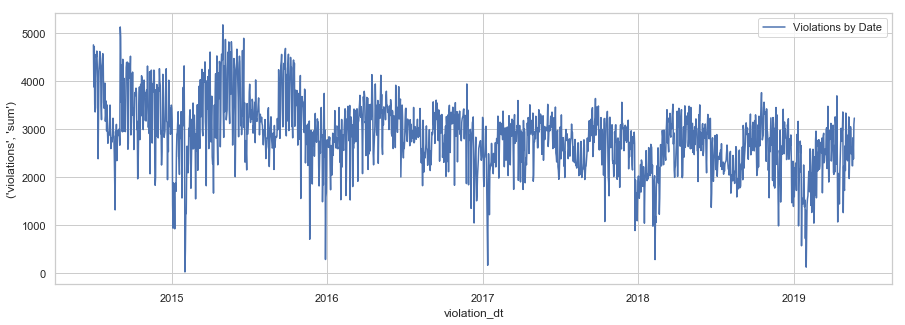

In [60]:
#plot
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
fig_f, ax_f = plt.subplots()
#plot by date
ax_f = sns.lineplot(x=by_date_df.index, y=by_date_df.iloc[:,0], label='Violations by Date', palette='muted')

In [ ]:
#by day of week
by_day_df = df['violation_dt'].da

In [110]:
#by ward aggregates
ward_df = df.groupby(['wards'])['violations'].agg([sum, 'count', np.mean, np.std])
ward_df.columns = ['violations', 'cameras', 'mean_vio_per_cam', 'vio_std']
ward_df.sort_values(axis=0, by='violations', inplace=True, ascending=False)
ward_df.head()


,violations,cameras,mean_vio_per_cam,vio_std
wards,,,,
38,622837,7735,80.521913,78.503492
14,325309,6048,53.787864,45.060393
4,309846,6819,45.438627,44.494447
43,282628,5106,55.352135,69.310013
47,243581,6726,36.214838,44.386234


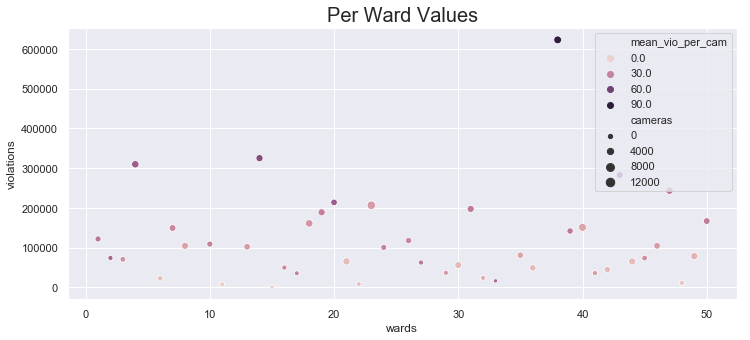

In [130]:
#plot
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("darkgrid")
#fig_w, ax_w = plt.subplots()
ax_w = sns.scatterplot(data=ward_df, x=ward_df.index, y='violations', hue='mean_vio_per_cam', 
                    size='cameras')
ax_w.legend(loc='upper right')
ax_w.set_title('Per Ward Values', size=20); 

No handles with labels found to put in legend.


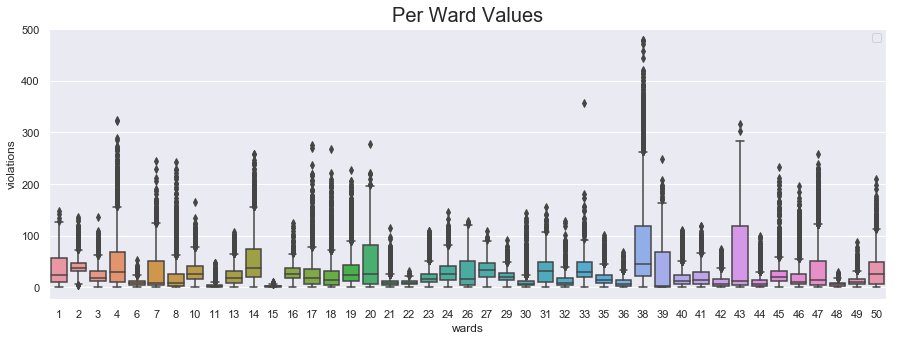

In [120]:
#boxplot
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("darkgrid")
#fig_w, ax_w = plt.subplots()
ax_w = sns.boxplot(x='wards', y='violations', data=df)
ax_w.legend(loc='upper right')
ax_w.set_title('Per Ward Values', size=20);

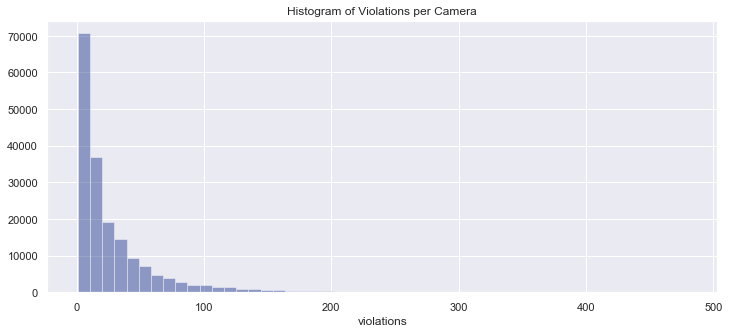

In [133]:
#histogram of all frequency
sns.set_palette('dark')
ax_h = sns.distplot(df.violations, kde=False)
ax_h.set_title("Histogram of Violations per Camera");

### Hypothesis:

1. changing or recalibrating lowest performing cameras. 
2. measuring traffic incidents near cameras. Do high violation locations measure just traffic, or places where there are non-intuitive 

### Analysis that highlights your experimental hypothesis.


### A rollout plan showing how you would implement and rollout the experiment


### An evaluation plan showing what constitutes success in this experiment

#### Primary success metric

#### Secondary metrics